In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import seaborn as sns

In [6]:
faces = fetch_lfw_people(min_faces_per_person=60)

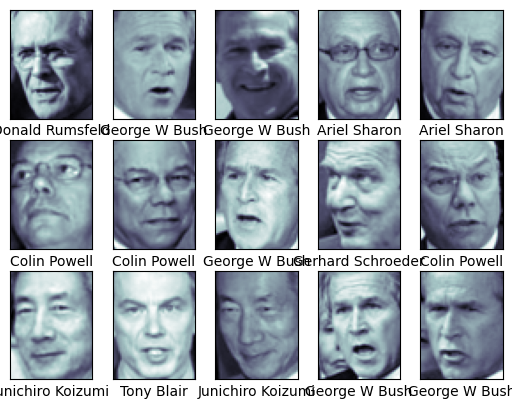

In [11]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [13]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [x for x in range(0, 50)],
              'svc__gamma': [(x/1000) for x in range (0, 5, 1)]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\

CPU times: total: 5min 33s
Wall time: 6min 51s
{'svc__C': 2, 'svc__gamma': 0.004}
0.8515761343804537


In [19]:
model = grid.best_estimator_
yfit = model.predict(X_test)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

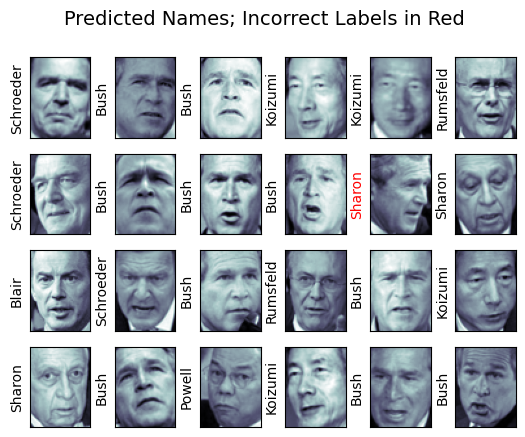

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.54      0.58        13
     Colin Powell       0.79      0.88      0.83        66
  Donald Rumsfeld       0.80      0.67      0.73        30
    George W Bush       0.90      0.94      0.92       139
Gerhard Schroeder       0.91      0.83      0.87        24
Junichiro Koizumi       1.00      0.94      0.97        17
       Tony Blair       0.93      0.84      0.88        31

         accuracy                           0.87       320
        macro avg       0.85      0.80      0.83       320
     weighted avg       0.87      0.87      0.86       320


Text(113.92222222222219, 0.5, 'predicted label')

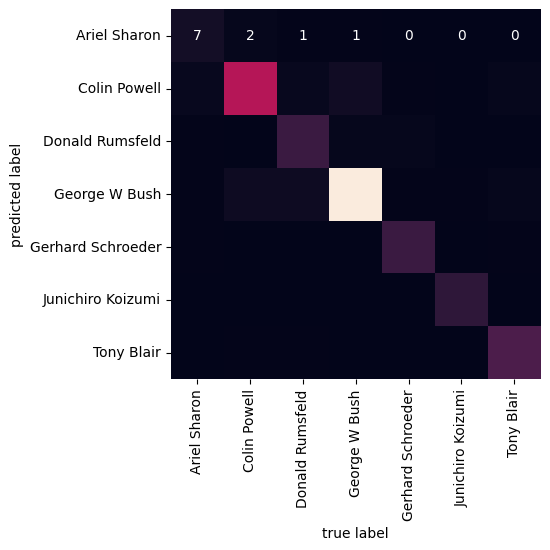

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')